### EXPLORATIVE DATA ANALYSIS (EDA) 4

* 'Estimation' is the application of an algorithm, for example taking an average
* 'Inference' involves putting an accuracy on the estimate (e.g. standard error of an evarage)
* Machine Learning and statistical inference are similar: In both cases, you are using data to learn/infer qualities of a distribution that generated the data (data-generating process).

* If 'inference' is about trying to find out the Data-Generating Process (DGP), then we can say that a statistical model (of the data) is a set of possible distributions or maybe even regressions.
* A 'parametric' model is a particular type of statistical model: it's also a set of distributions or regressions, but they have a finite number of parameters.
* In 'non-parametric' statistics, we make fewer assumptions. In particular, we don't assume that the data belong to any particular distribution (distribution-free inference)

* An example of a parametric Model: A Normal Distribution
* The most common way of estimating parameters in a parametric model is through 'maximum likelihood estimation (MLE)'.

#### COMMON DISTRIBUTIONS

* 'Uniform Distibution': uniformly equal chance that you get any value in your range.
* 'Gaussian/Normal Distribution: Most likely is the closest to the mean. 
* 'Log Normal Distribution': if you take the log of the distribution then you have a normal distribution.
* 'Exponential Distribution': What is going to be the amount of time before the next event.
* 'Poisson Distribution': Number of events during the certain amount of time.

#### FREQUENTIST vs. BAYESIAN STATISTICS

* A 'Frequentist' is concerned with repeated observations in the limit. (No prior knowledge, many repeats of an experiment, collect as much data as possible)
* A 'Bayesian' describes parameters by probability distributions. (before seeing the data, a prior distribution is formulated. Update the prior distribution after seeing data. This new updated distribution is called posterior distribution.

#### HYPOTHESIS TESTING: TERMINOLOGY

* The likelihood ration is called a 'test statistic': we use it to decide whether to accept/reject H0.
* The 'rejection region': is the set of values of the test statistic that lead to rejection of H0.
* The 'acceptance region': is the set of values of the test statistic that lead to acceptance of H0.
* The 'null distribution': is test statistic's distribution when the null is true.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats 
import math

Our null hypothesis should be that I'm not special. My true rate of flip prediction is actually just 50/50, that every time you flip a coin I have an equal chance of getting it correct or incorrect. And even under this hypothesis, I could get 57 out of 100, right? So we want to determine did I get lucky and get 57 by random chance or am I truly mystical and can predict above the 50/50 chance? The alternative would be that my true rate of flip prediction is actually greater than 0.5, so that I actually can do better than a 50/50 guess. And the thing that we're measuring from the experiment or our test statistic, which allows us to decide whether to reject or accept the null, will depend on the number of correct flip predictions out of 100. Now if the null hypothesis is correct, the test statistic is binomially distributed with parameters n = 100, number of flips and P equals 0.5. That is, if we repeated this whole experiment many times, kept flipping 100 and saying how many we got correct, we would see such a distribution for all of the results. So if the null hypothesis is correct, how likely is it that I would get 57 or more coin flips correct? That's the question that we're trying to ask. Before we check, we want to put a marker and say anything above this marker or below this marker in regards to this chance of me getting a certain amount correct, will convince us that I have ESP.

In [2]:
from scipy.stats import binom
prob = 1 - binom.cdf(56, 100, 0.5)

print(str(round(prob*100,1))+"%")

9.7%


The probability of getting 57 or more correct is about 9.7%. This is more than 5%, so we can't reject the null (H0) hypothesis.

In [3]:
from scipy.stats import binom
print(binom.ppf(0.95, 100, 0.5)+1)

59.0


one should get 59 tosses or more to be considered clairvoyant. And we will say the person has predictive power with a confidence level of 95%.



just say, we have two competing hypotheses: 
- Hypothesis A: There is no predictive power 
- Hypothesis B: There is a 60% predictive power

Each is a normal curve, with one centered at 50% and the other at 60%.

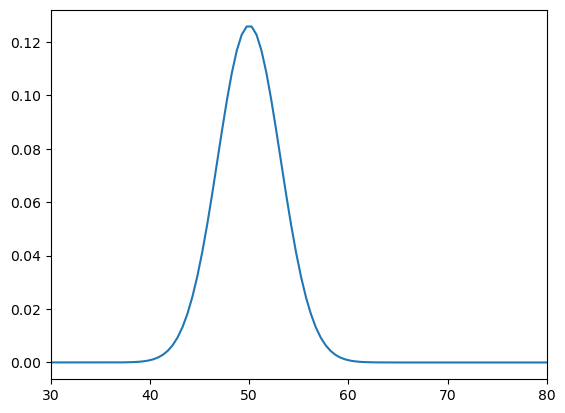

In [4]:
mu = 50
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1,100,200)
plt.plot(x,stats.norm.pdf(x,mu,sigma))

mu = 60
variance = 10
sigma = math.sqrt(variance)
x = np.linspace(1,100,200)

plt.xlim(30,80)
plt.show()

And 57 correct guesses falls within the 95% confidence of both the curves:

In [5]:
print(1-binom.cdf(57,100,0.5))
print(binom.cdf(57,100,0.6))

0.06660530960360689
0.3032601298434456


DECREASE CONFIDENCE: Since we have a claim at 50 and 60, we can pick the mid-point, which is 55. We can say if I can predict over 55, then I have predictive power. This would mean that we have decreased our confidence level.

In [6]:
print(1-binom.cdf(55,100,0.5))
print(binom.cdf(54,100,0.6))

0.13562651203691778
0.13109045261974764


At an 87% percent confidence level, we can say that I have some predictive power, since I got 57 tosses correct.

#### Be biased

In [7]:
binom.ppf(0.95,100,0.5)

58.0

In [8]:
print (1-binom.cdf(58, 100, 0.5))
print (binom.cdf(58, 100, 0.6))

0.04431304005703385
0.37746732387782933


5% chance someone has no power and we say they do. But a 38% chance someone has predictive power and we say no. 

#### Increased Sample Size: 1000 tosses instead of 100.

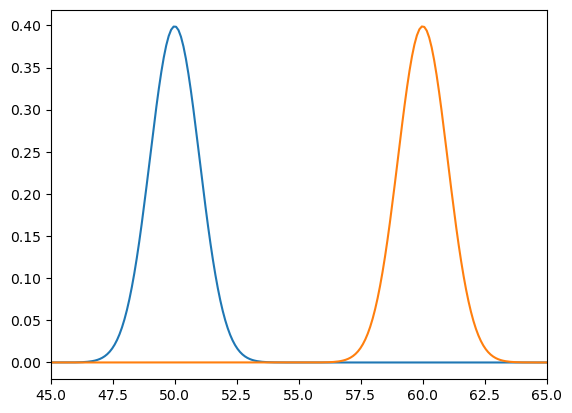

In [9]:
mu = 50
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

mu = 60
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(1, 100, 1000)
plt.plot(x,stats.norm.pdf(x, mu, sigma))

plt.xlim(45,65)
plt.show()

In [10]:
print (binom.ppf(0.95,1000,0.5))
print (binom.ppf(0.05,1000,0.6))

526.0
574.0


In [11]:
# errors now?

print (1-binom.cdf(550, 1000, 0.5))
print (binom.cdf(550, 1000, 0.6))

0.0006958707972110068
0.0007412028990060175


In [12]:
import warnings 
warnings.filterwarnings('ignore')

In [13]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import scipy.stats as stats 
from scipy.stats import chi2_contingency

from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [17]:
RL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/insurance.csv'
data = pd.read_csv(URL)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [19]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


$ 𝐻_{0}:\mu_{1}-\mu_{2} = 0 $ There is no difference between the BMI of male and BMI of female. \
$ 𝐻_{A}:\mu_{1}-\mu_{2} \ne 0 $ There is a difference between the BMI of male and BMI of female.

![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0232EN-SkillsNetwork/asset/Hypothesis_Testing_3.png)

To set the criteria for a decision, we state the level of significance for a test. It could be 5%, 1% or 0.5%. Based on the level of significance, we can make a decision whether to accept the null hypothesis and reject the alternate, and vise versa.

The diagram above describes the principles of hypothesis testing. We will choose 5% significance level. Therefore, our $ \alpha=0.05 $. Since we have a 2-tailed test, we have to divide alpha by 2, which gives us 0.025. So, if the calculated p-value is less than alpha, we will reject the null hypothesis. The significance level is based on the business requirements.

I will use one of the t-test, z-score, f-score or chi-squared statistics to evaluate our results.

In [20]:
# get all observations for females and males by using the loc() function.

female = data.loc[data.sex=="female"]
male = data.loc[data.sex =="male"]

In [21]:
# select the bmi values for females and males.

f_bmi = female.bmi
m_bmi = male.bmi

<Axes: xlabel='bmi', ylabel='Density'>

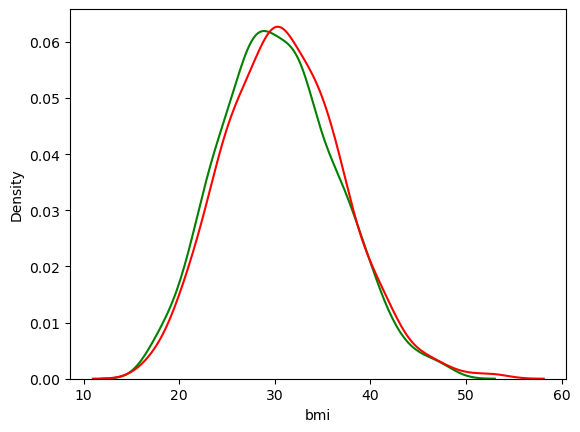

In [22]:
import seaborn as sns

sns.distplot(f_bmi, color='green', hist=False)
sns.distplot(m_bmi, color='red', hist=False)

the two distributions are very similar.

In [24]:
print(female.bmi.mean())
print(male.bmi.mean())

30.37774924471299
30.943128698224854


In [26]:
# calculate t-value and p-value.

alpha=0.05
t_value1, p_value1 = stats.ttest_ind(m_bmi, f_bmi)
print("t_value1 = ",t_value1, ", p_value1 = ", p_value1)

t_value1 =  1.696752635752224 , p_value1 =  0.08997637178984932


In [27]:
if p_value1 <alpha:
    print("Conclusion: since p_value {} is less than alpha {} ". format (p_value1,alpha))
    print("Reject the null hypothesis that there is no difference between bmi of females and bmi of males.")
    
else:
    print("Conclusion: since p_value {} is greater than alpha {} ". format (p_value1,alpha))
    print("Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.")

Conclusion: since p_value 0.08997637178984932 is greater than alpha 0.05 
Fail to reject the null hypothesis that there is a difference between bmi of females and bmi of males.


compare the mean values (𝜇) of population of people who smoke and those who do not smoke. First, we need to calculate the mean values of smoking and non smoking populations.

In [28]:
smoker = data.loc[data.smoker=="yes"]
smoker_char = smoker.charges
sch_mean = smoker_char.mean()
sch_mean

32050.23183153284

In [31]:
nonsmoker = data.loc[data.smoker=="no"]
nonsmoker_char = nonsmoker.charges
nsch_mean = nonsmoker_char.mean()
nsch_mean

8434.268297856204

$ 𝐻_{0}:\mu_{1} \leq \mu_{2} $ The average charges of smokers are less than or equal to nonsmokers. \
$ 𝐻_{A}:\mu_{1} > \mu_{2} $ The average charges of smokers are greater than or equal to nonsmokers.

[Text(0.5, 1.0, 'Fig:1 Smoker vs Charges')]

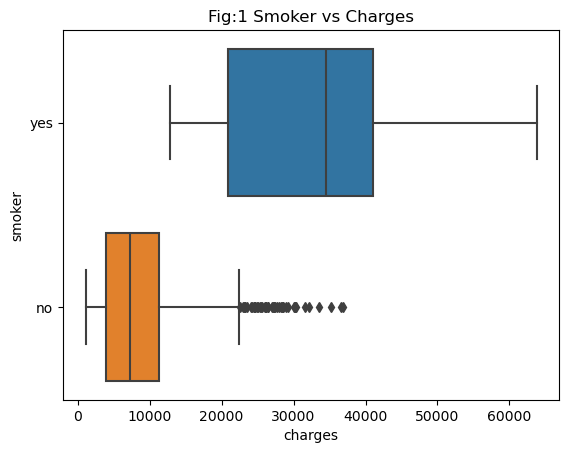

In [32]:
# plot our smoking versus nonsmoking populations by using seaborn boxplot() function.
sns.boxplot(x=data.charges,y=data.smoker,data=data).set(title="Fig:1 Smoker vs Charges")

In [33]:
# calculate t-value and p-value of charges for smoking and nonsmoking populations.
alpha=0.05
t_val2, p_value2 = stats.ttest_ind(smoker_char, nonsmoker_char)
p_value_onetail=p_value2/2
print("t_value = {} , p_value ={} , p_value_onetail = {}".format(t_val2, p_value2, p_value_onetail))

t_value = 46.66492117272371 , p_value =8.271435842179101e-283 , p_value_onetail = 4.1357179210895507e-283


In [34]:
if p_value2 <= alpha:
    print("Conclusion: Since p-value {} is less than or equal to alpha {}.".format(p_value2, alpha))
    print("Reject the null hypothesis: average charges for smokers are less than nonsmokers.")
else:
    print("Conclusion: Since p-value {} is greater than alpha {}.".format(p_value2, alpha))
    print("Failed to reject the null hypothesis: average charges for smokers are less than nonsmokers.")

Conclusion: Since p-value 8.271435842179101e-283 is less than or equal to alpha 0.05.
Reject the null hypothesis: average charges for smokers are less than nonsmokers.


$ 𝐻_{0}:\mu_{1}=\mu_{2}=\mu_{3} $ The mean BMI of women with no children , one child, and two children are the same. \
$ 𝐻_{A}: $ At least one of the means for women's BMI is not the same.


In [35]:
# filter data for women with 0, 1 and 2 children.

female_children = female.loc[female['children']<=2]

In [37]:
# use groupby() function to group the information by the number of children and bmi values.
female_children.groupby([female_children.children]).bmi.mean()

children
0    30.361522
1    30.052658
2    30.649790
Name: bmi, dtype: float64

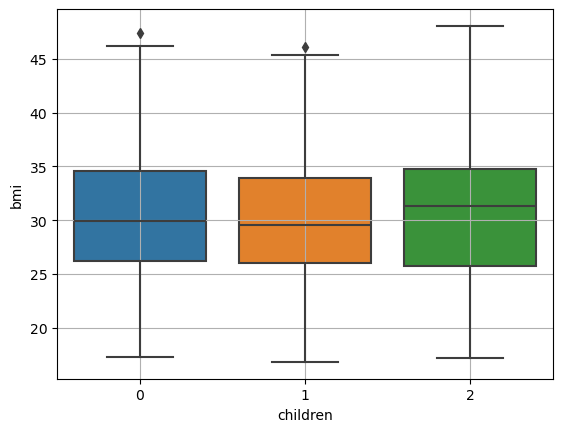

In [38]:
# draw the boxplots to visualize the difference in bmi values between these 3 groups.
sns.boxplot(x="children", y="bmi", data=female_children)
plt.grid()
plt.show()

construct the ANOVA table and check for each groups count (0,1,2 children) against the bmi values. We will use the ols (ordinary least squares) model for estimation of the unknown parameters.

In [39]:
formula = 'bmi ~ C(children)'
model = ols(formula, female_children).fit()
aov_table = anova_lm(model)
aov_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),2.0,24.590123,12.295062,0.334472,0.715858
Residual,563.0,20695.661583,36.759612,NaN,NaN


Conclusion: p-value is 0.715858 and it is greater than the alpha (0.05), therefore we fail to reject the null hypothesis and conclude that the mean bmi of women with no children, one child, and two children are the same.

$ 𝐻_{0} $: Smokers proportions are not significantly different across the different regions. \
$ 𝐻_{A} $: Smokers proportions are different across the different regions.

calculate a contingency table between the proportions of smokers in different regions. For this, use pandas crosstab() function.

In [40]:
contingency= pd.crosstab(data.region, data.smoker)
contingency

smoker,no,yes
region,,
northeast,257,67
northwest,267,58
southeast,273,91
southwest,267,58


Text(0.5, 1.0, 'Distribution of Smokers and Non-Smokers by Region')

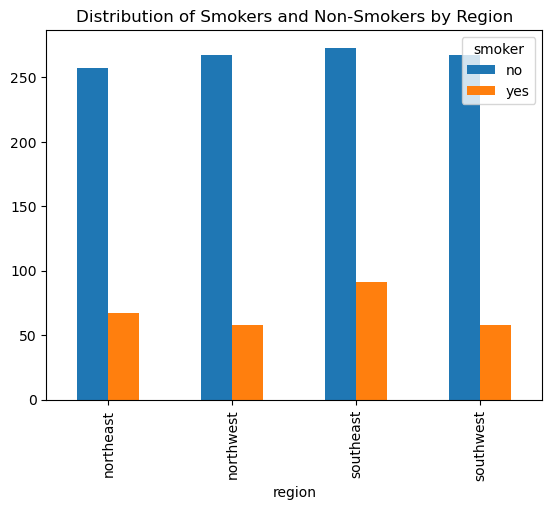

In [41]:
# plot the distribution of nonsmokers/smokers across 4 different regions.
contingency.plot(kind='bar')
plt.title('Distribution of Smokers and Non-Smokers by Region')

 using chi2_contingency() method, from the scipy.stats chi2_contingency, I will calculate chi-squared, p-value, degrees of freedom, and expected frequencies for our data.

In [42]:
chi2, p_val, dof, exp_freq = chi2_contingency(contingency, correction = False)
print('chi-square statistic: {} , p_value: {} , degree of freedom: {} ,expected frequencies: {} '.format(chi2, p_val, dof, exp_freq))

chi-square statistic: 7.343477761407071 , p_value: 0.06171954839170541 , degree of freedom: 3 ,expected frequencies: [[257.65022422  66.34977578]
 [258.44544096  66.55455904]
 [289.45889387  74.54110613]
 [258.44544096  66.55455904]] 


In [43]:
if (p_val < 0.05):
    print('Reject the null hypothesis, that the smokers proportions are not significantly different across the different regions')
else:
    print('Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions')

Accept the null hypothesis, that the smokers proportions are not significantly different across the different regions
